**Car Price Prediction**

Problem Statement: A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

Business Goal You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-data/Data Dictionary - carprices.xlsx
/kaggle/input/car-data/CarPrice_Assignment.csv


In [2]:
data=pd.read_csv('/kaggle/input/car-data/CarPrice_Assignment.csv');
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Checking dataset's info
print(data.shape);
data.info()

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

In [4]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [5]:
#Too many unique values. Need to split it into single car names
data['CarName']=data['CarName'].apply(lambda x: x.split(' ')[0]);
print(data['CarName'].head());
data['CarName'].unique()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
# Similar car names have different spellings;

def Name_replace(name1,name2):
    data['CarName'].replace(name1,name2,inplace=True);

Name_replace('maxda','mazda');
Name_replace('Nissan','nissan');
Name_replace('porcshce','porsche');
Name_replace('toyouta','toyota');
Name_replace('vokswagen','volkswagen');
Name_replace('vw','volkswagen');

data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [7]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
data.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

# Creating Functions to help in drawing different types of plots

In [9]:
def scatter_plot(x,figure):
    plt.subplot(5,2,figure);
    plt.scatter(data[x],data['price']);
    plt.title(x+' vs Price');
    plt.ylabel('price');
    plt.xlabel(x);
    plt.xticks(rotation=90);

def count_plot(y,palette):
    fig=plt.subplots(figsize=(20,6));
    sns.countplot(y,data=data,palette=palette);
    plt.xticks(rotation=90);
    
def avg_var_plot(z):
    data1=pd.DataFrame(data.groupby([z])['price'].mean().sort_values(ascending=False)).plot.bar(figsize=(20,8));
    plt.title(z+' vs AvgPrice');
    plt.xticks(rotation=90);
    plt.ylabel('price')

# Visualizing Categorical Data

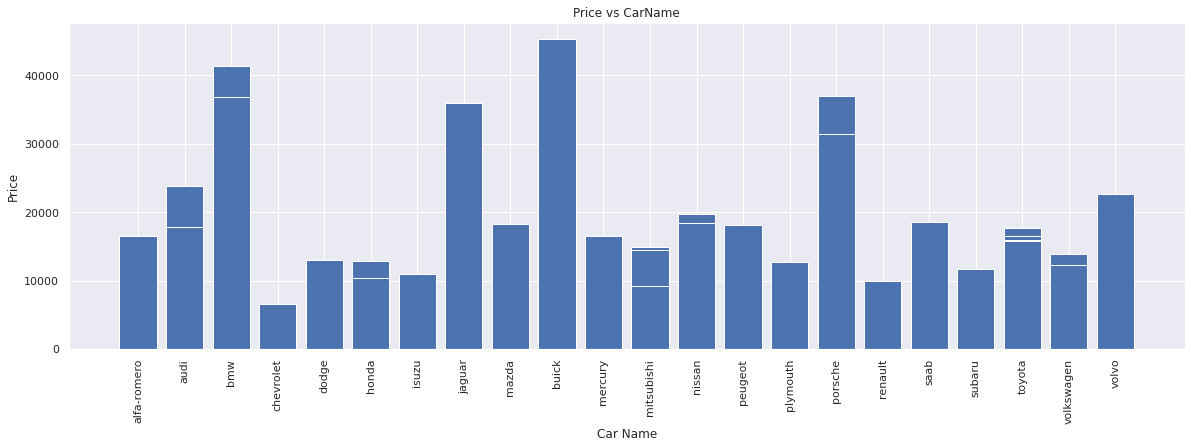

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

fig=plt.subplots(figsize=(20,6));
plt.bar(data['CarName'],data['price']);
plt.xlabel('Car Name');
plt.ylabel('Price');
plt.title('Price vs CarName')
plt.xticks(rotation=90);

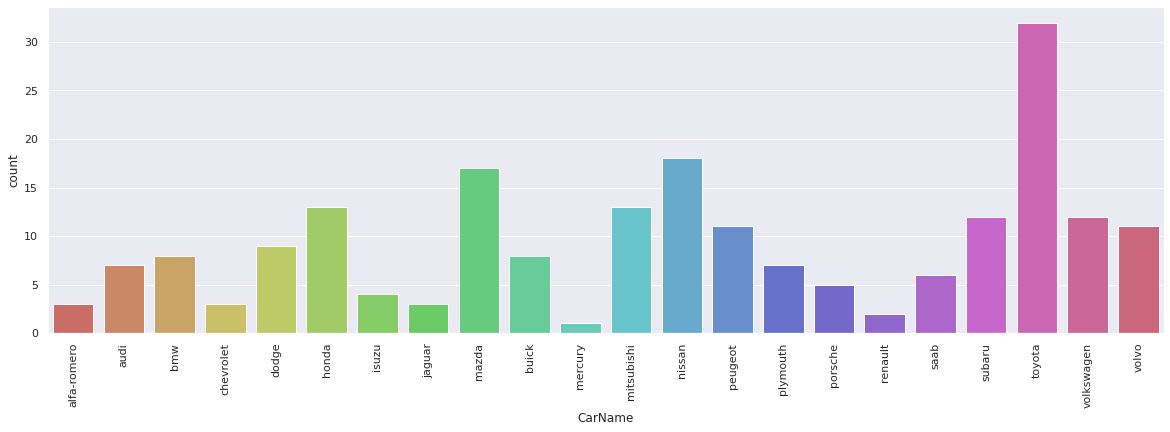

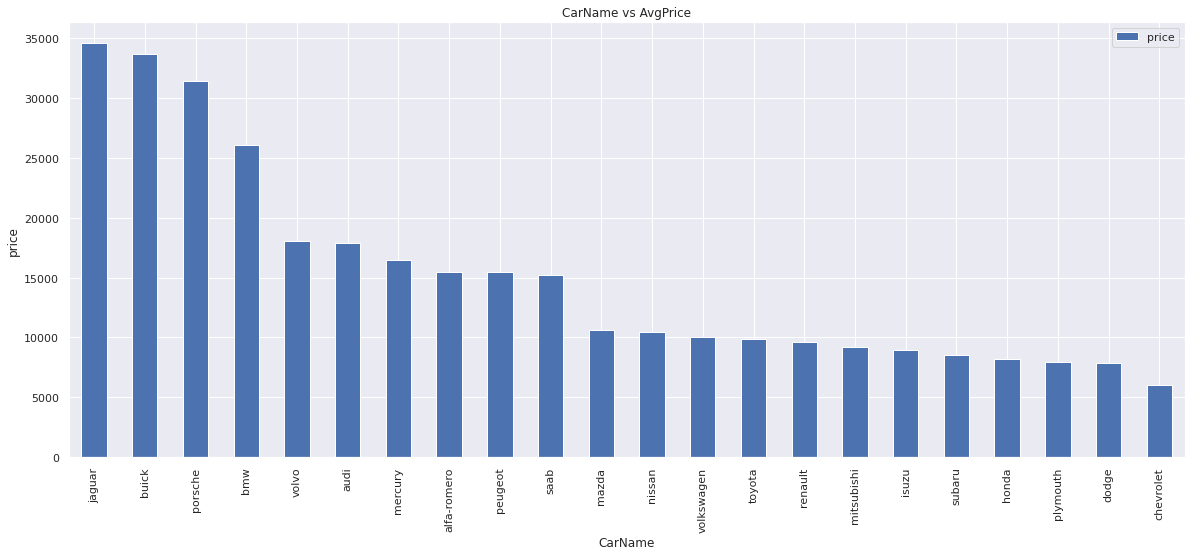

In [11]:
count_plot('CarName','hls');
avg_var_plot('CarName');
#Toyota is the most preferred choice of car and is less expensive.

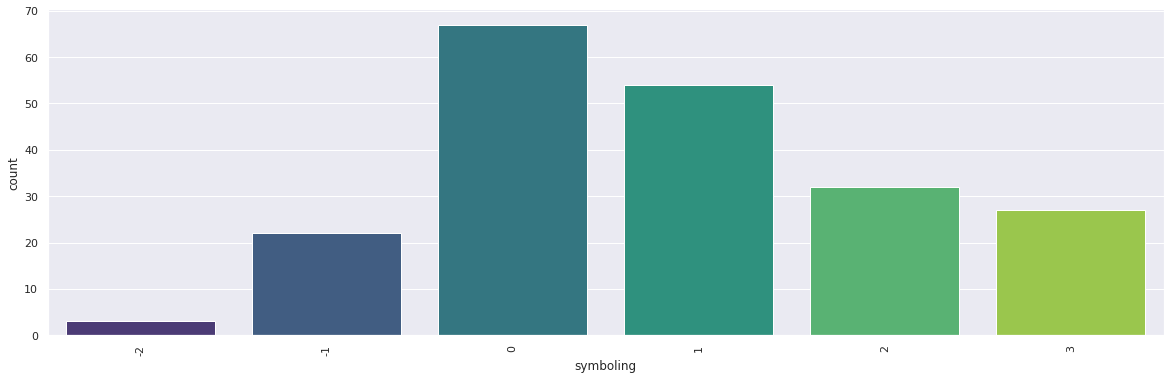

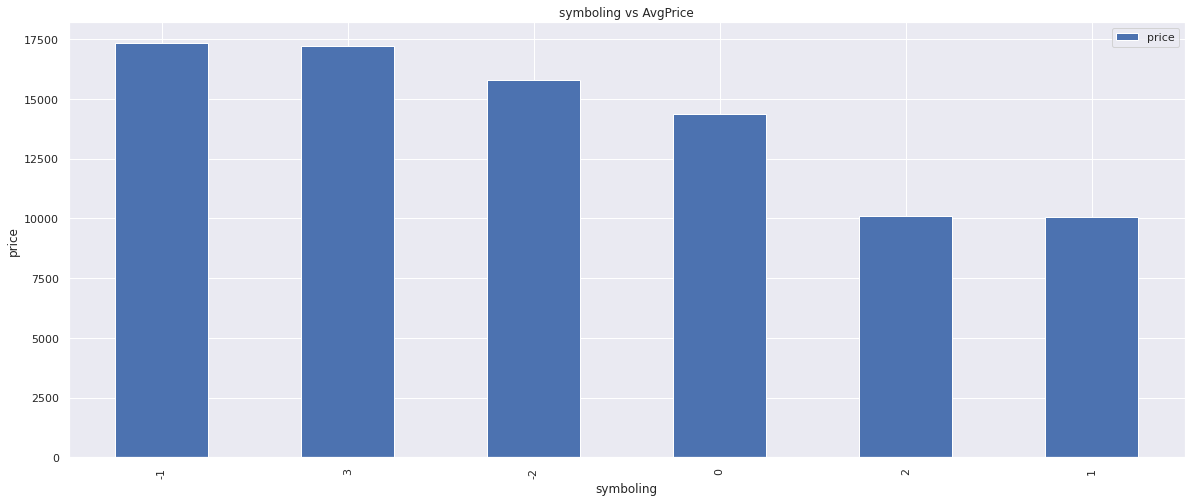

In [12]:
count_plot('symboling','viridis');
avg_var_plot('symboling');

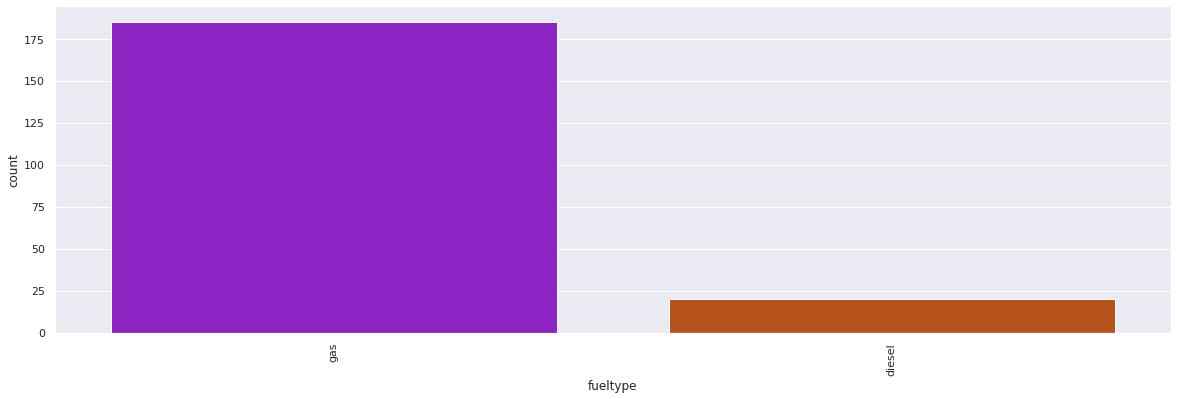

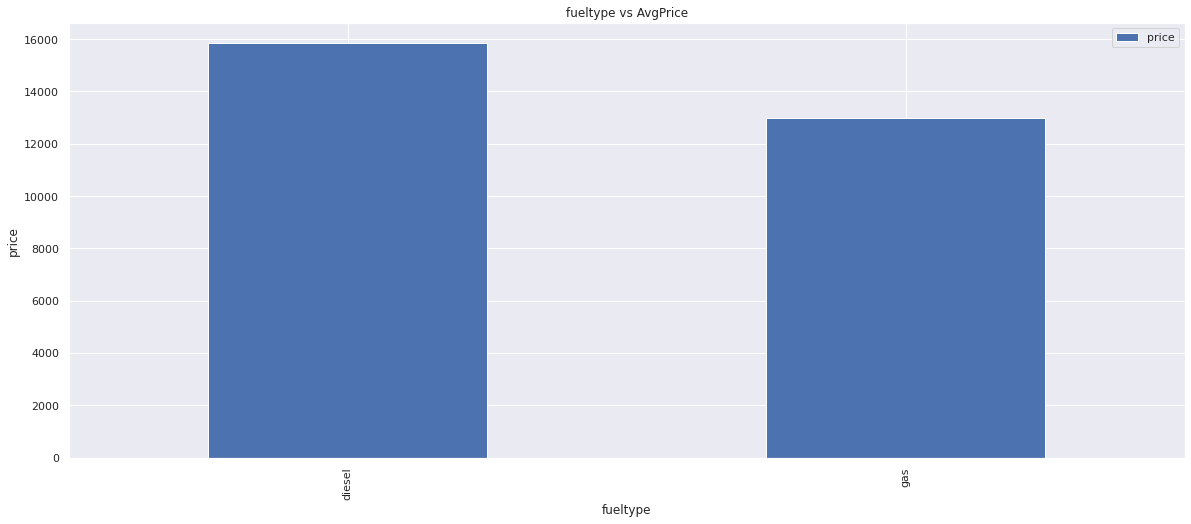

In [13]:
count_plot('fueltype','gnuplot');
avg_var_plot('fueltype');

#Gas is the most preferred fuel type and is cheaper than diesel.

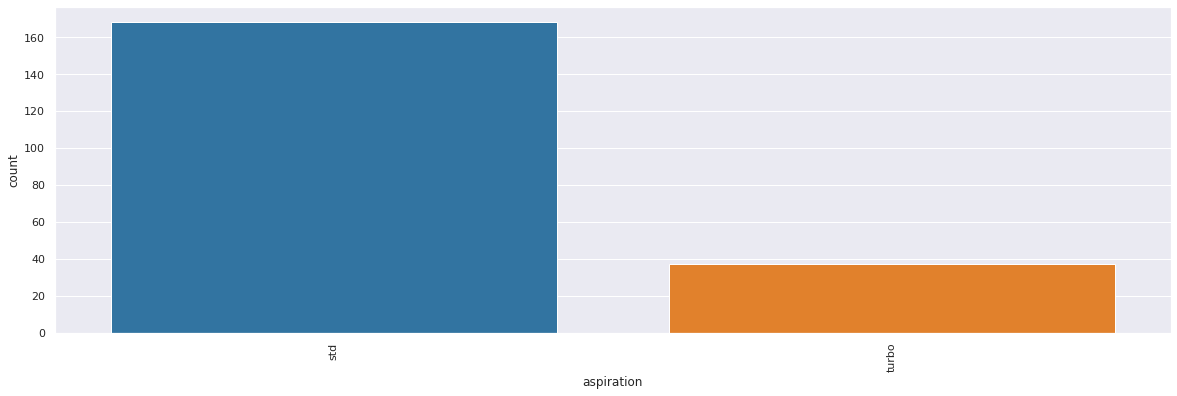

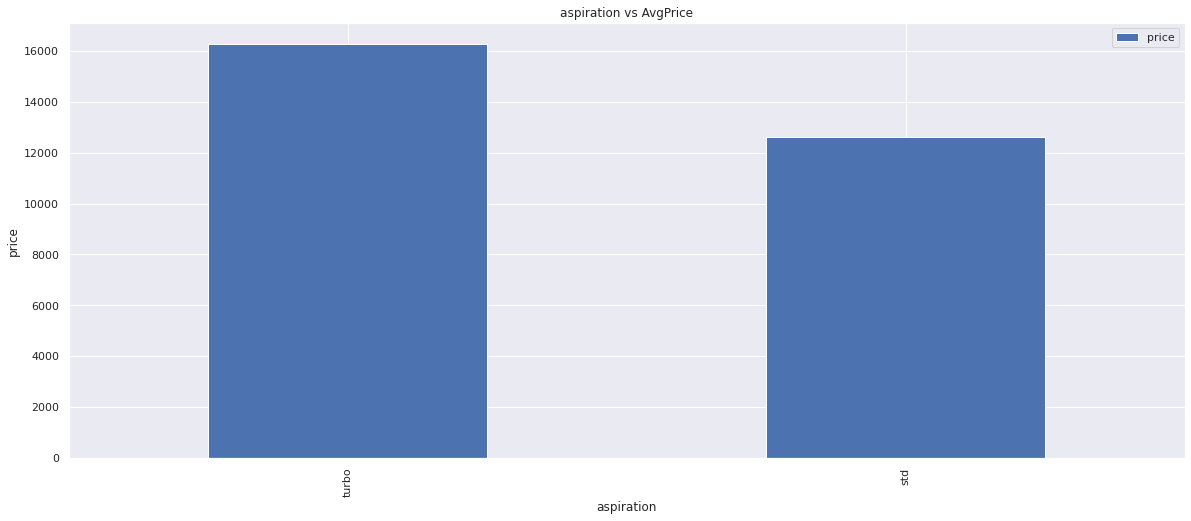

In [14]:
count_plot('aspiration','tab10');
avg_var_plot('aspiration');

#Std is most preferred and is cheaper.

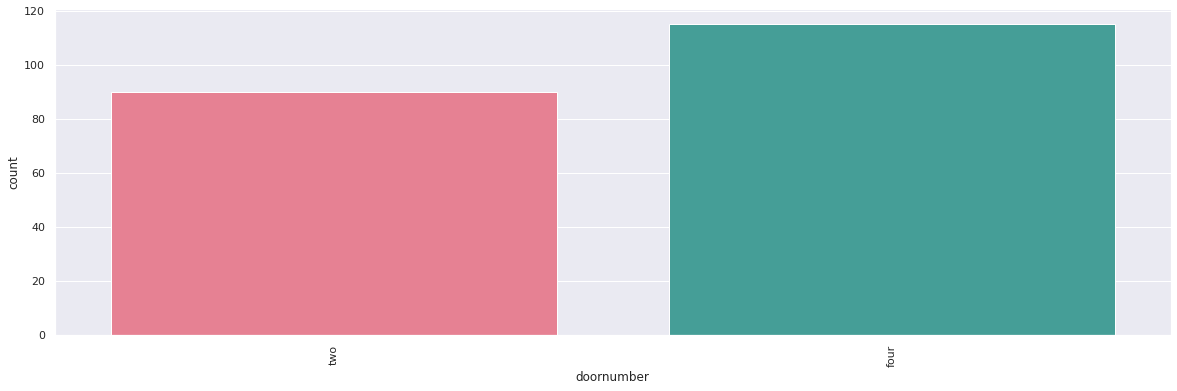

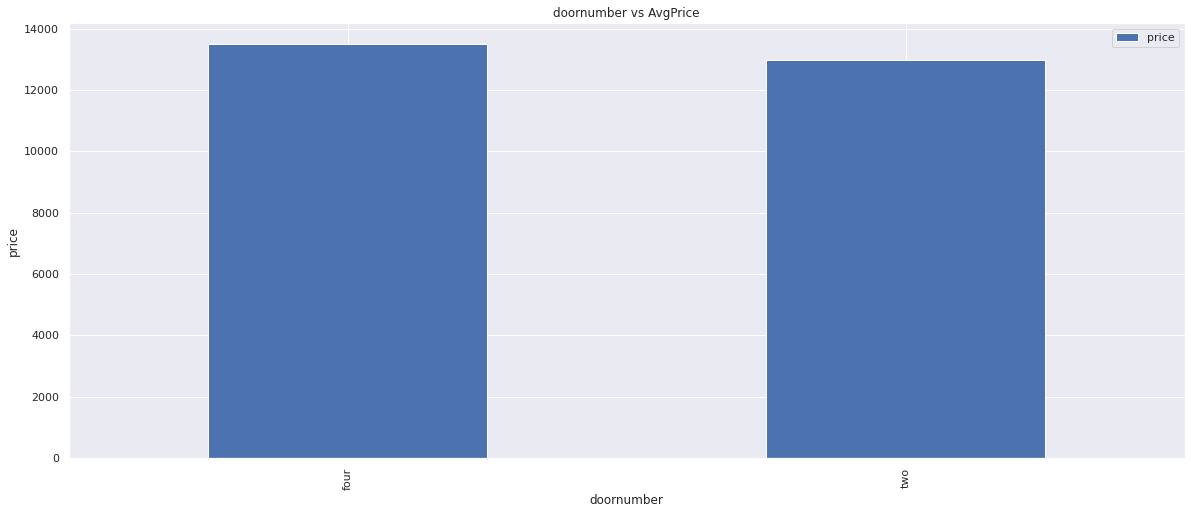

In [15]:
count_plot('doornumber','husl');
avg_var_plot('doornumber');

#there is not much difference between the door numbers in terms of price and count

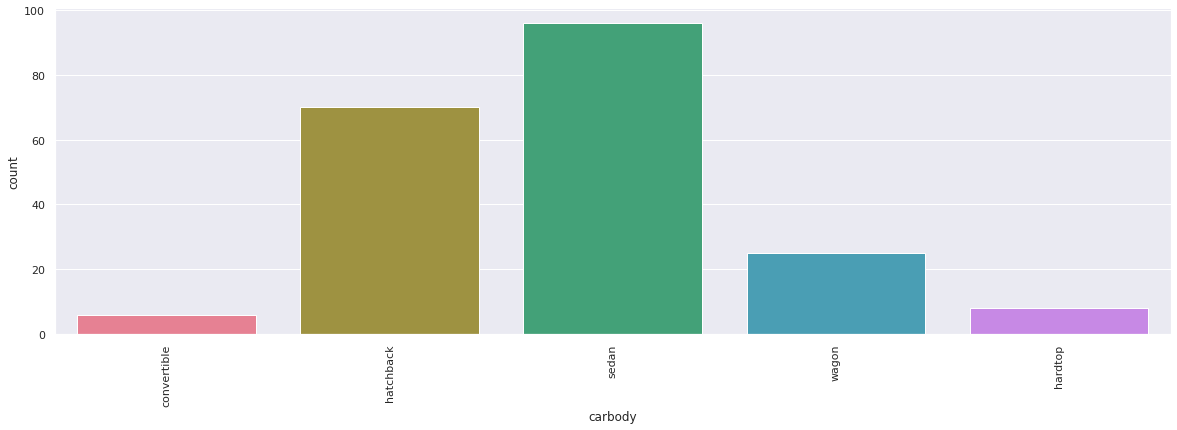

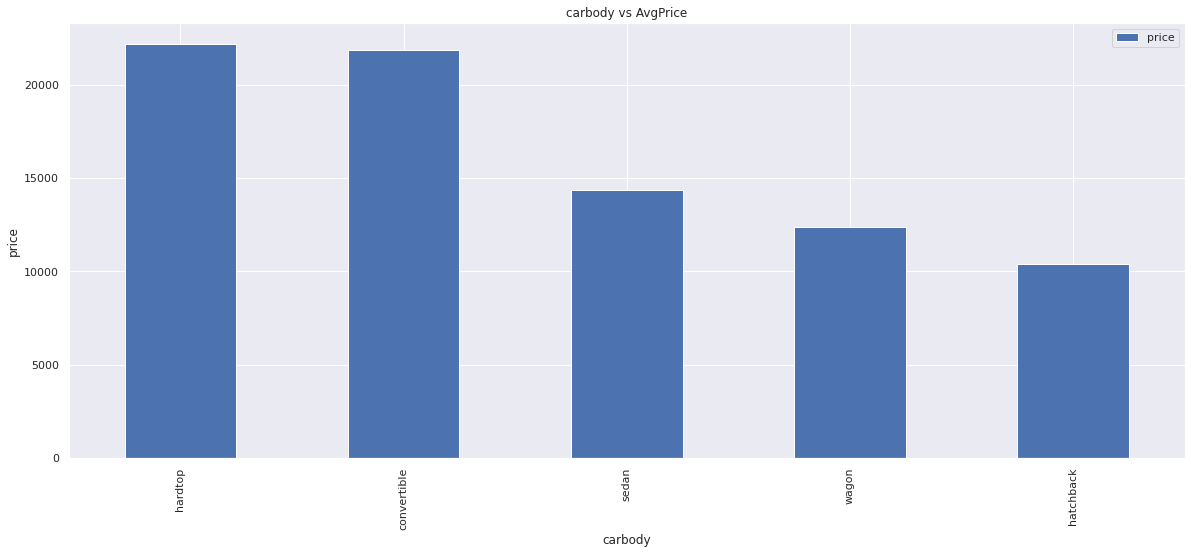

In [16]:
count_plot('carbody','husl');
avg_var_plot('carbody');

#Sedan is the most preferred choice and is cheaper

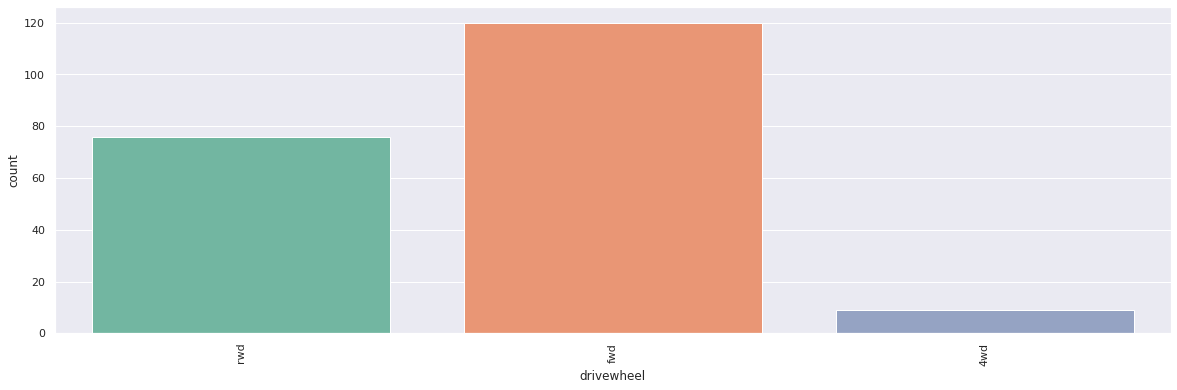

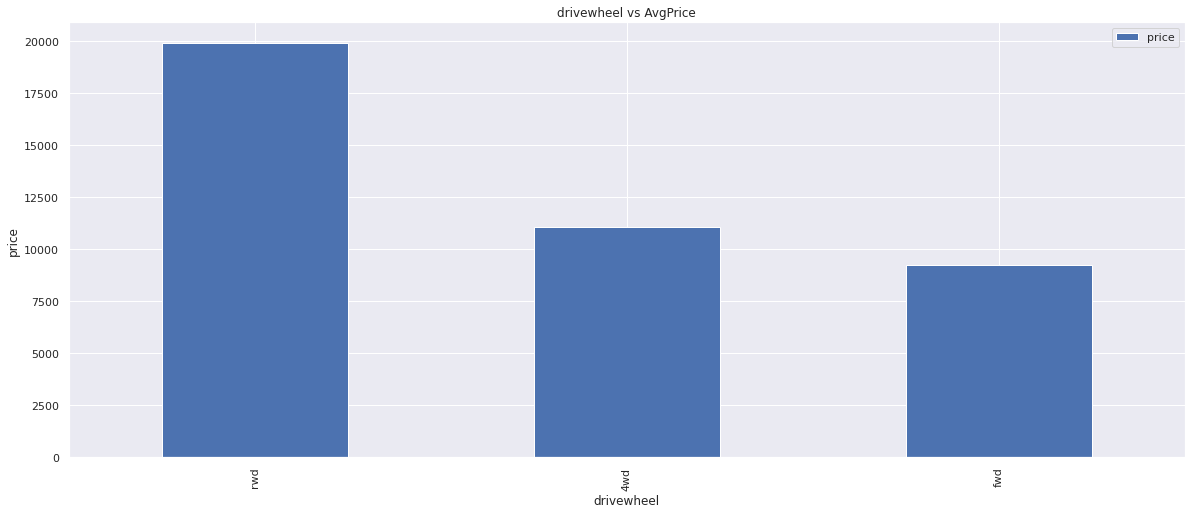

In [17]:
count_plot('drivewheel','Set2');
avg_var_plot('drivewheel');

#fwd is preferred and is cheap

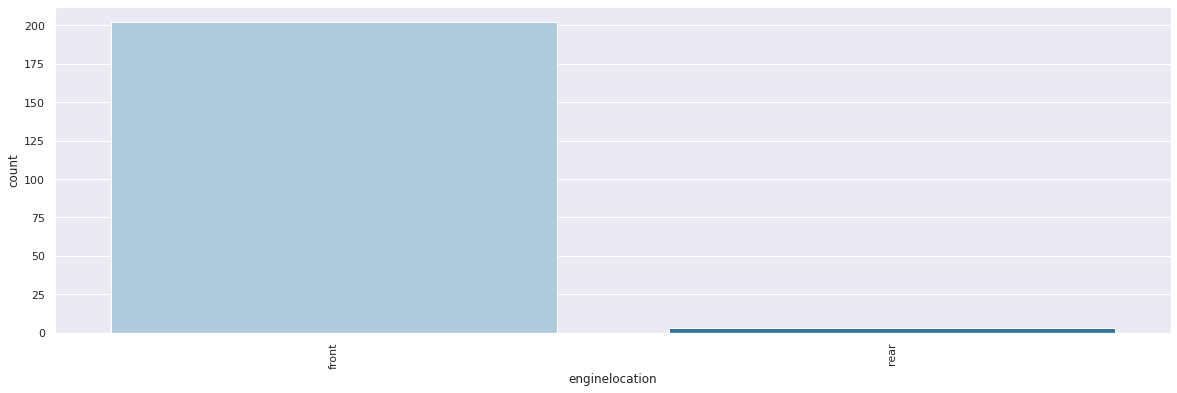

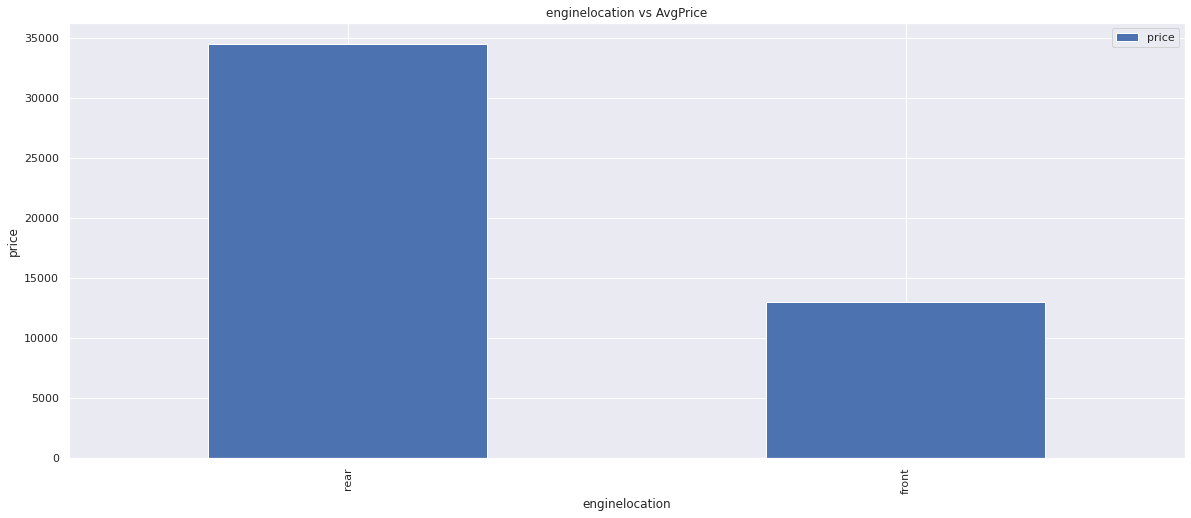

In [18]:
count_plot('enginelocation','Paired');
avg_var_plot('enginelocation');

#Cars with engine at the front are more in number and relatively cheap

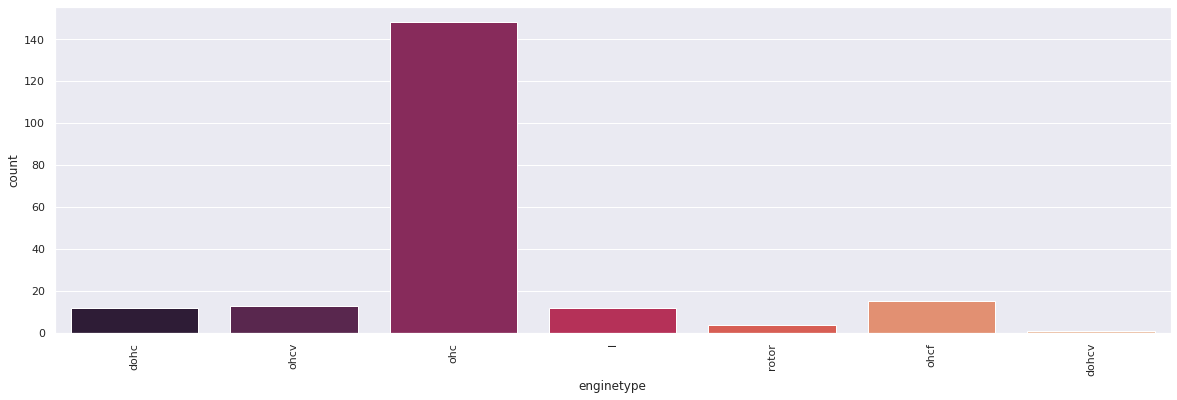

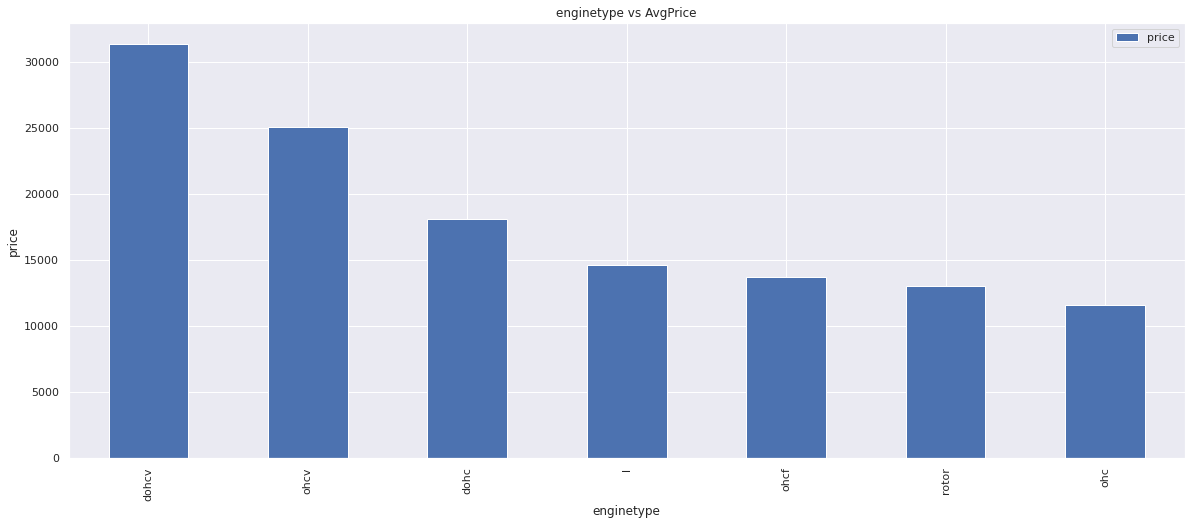

In [19]:
count_plot('enginetype','rocket');
avg_var_plot('enginetype');

#Ohc is the preferred engine type and is the cheapest

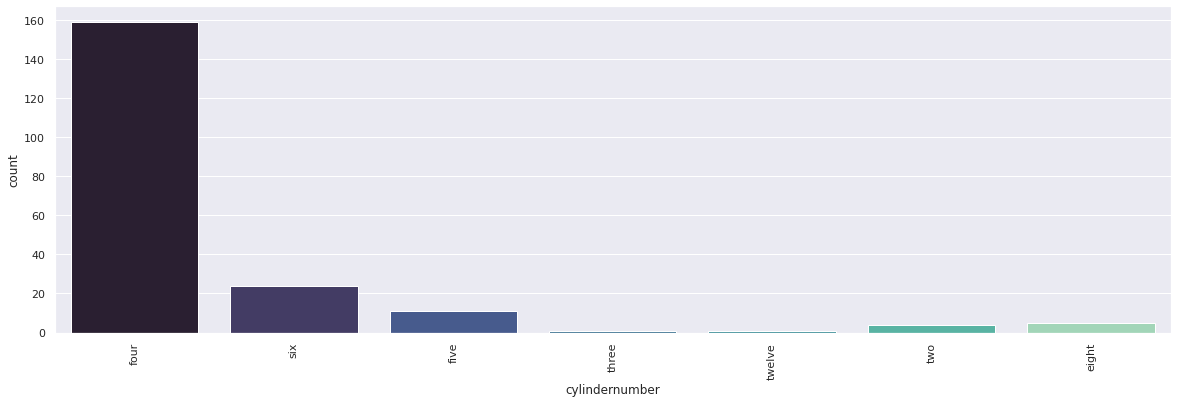

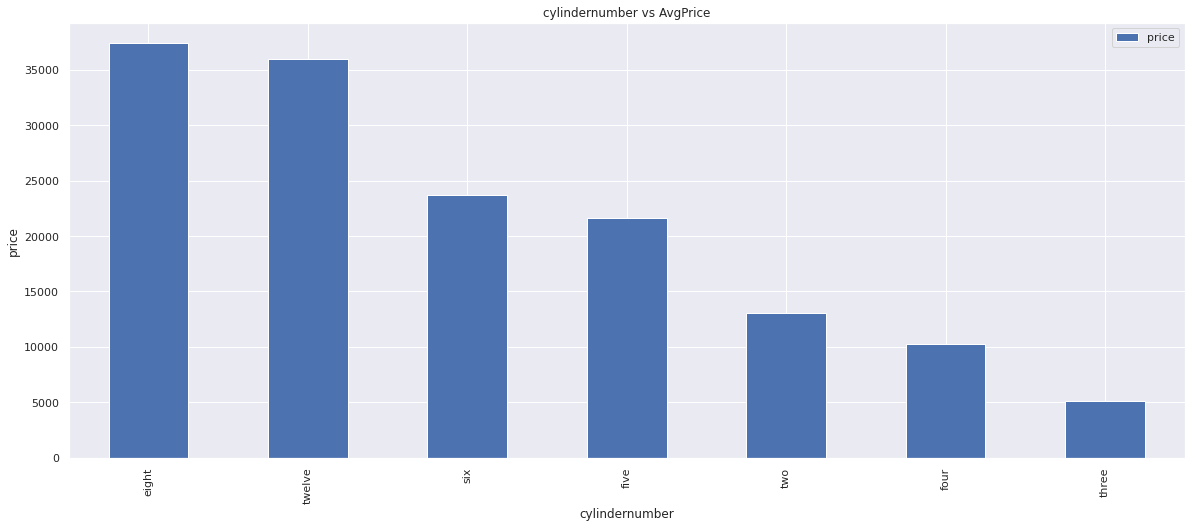

In [20]:
count_plot('cylindernumber','mako');
avg_var_plot('cylindernumber');

#cars with 4 cylinder number are in abundance and are relatively cheaper

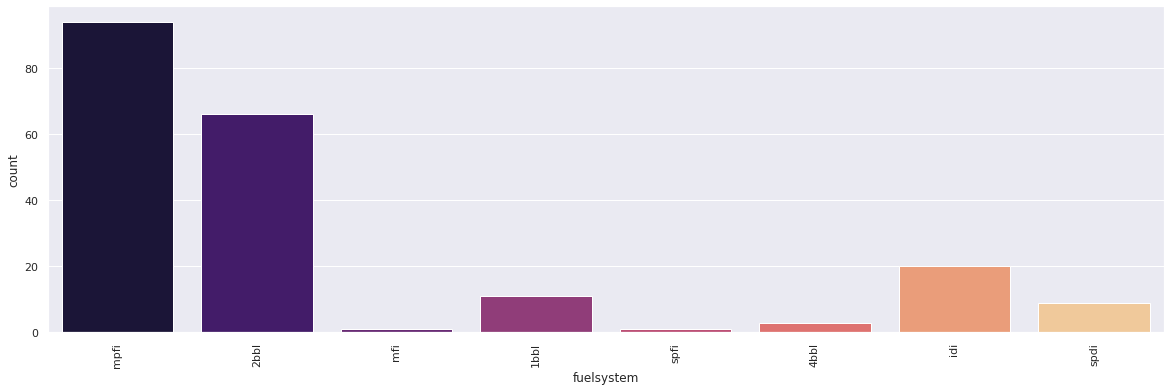

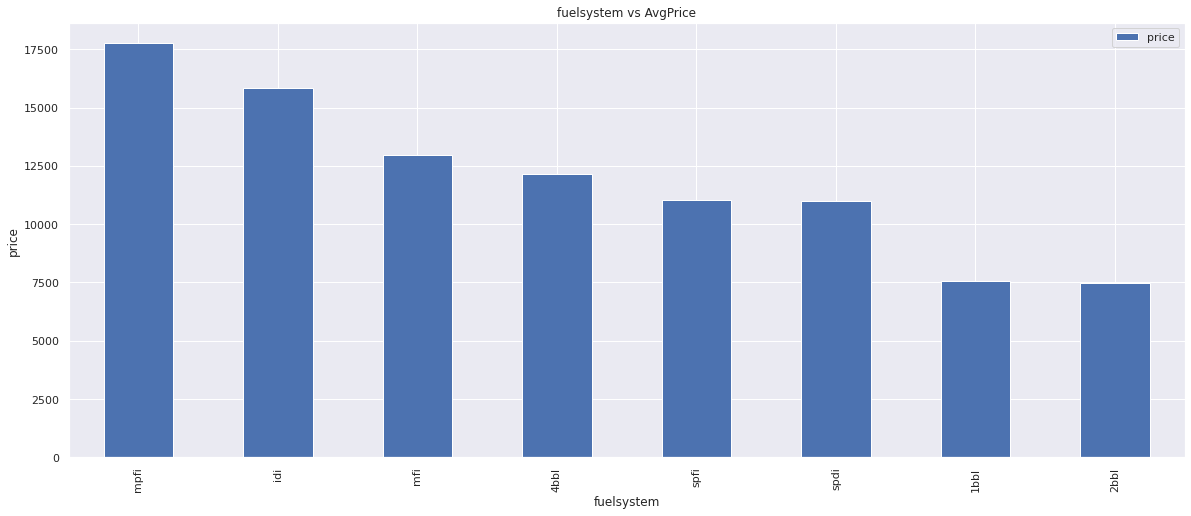

In [21]:
count_plot('fuelsystem','magma');
avg_var_plot('fuelsystem');

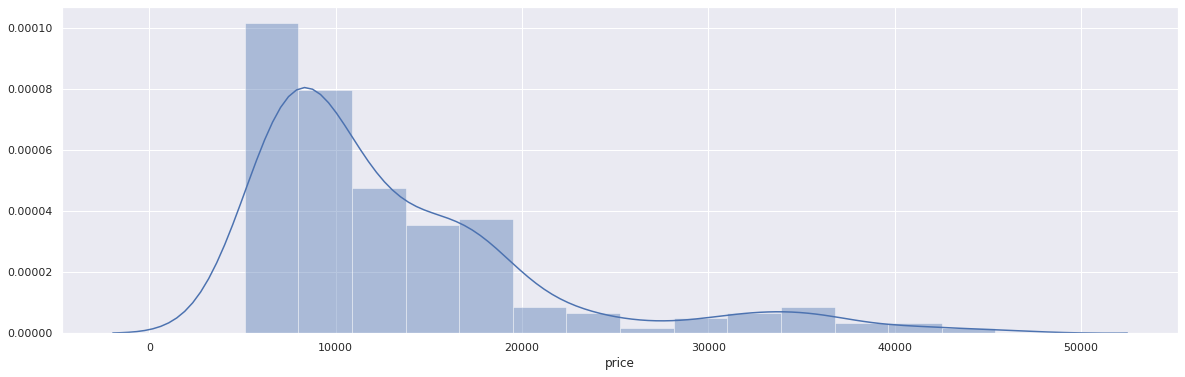

In [22]:
fig=plt.subplots(figsize=(20,6))
sns.distplot(data.price)

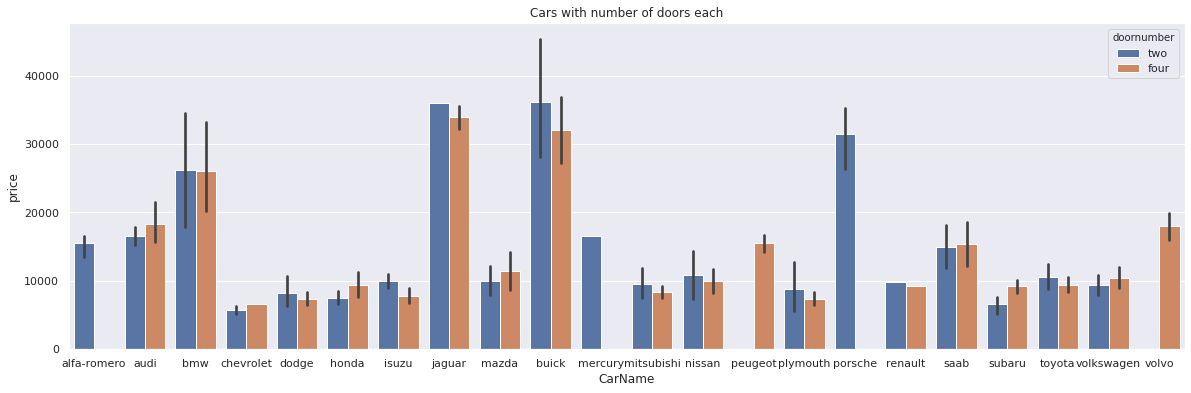

In [23]:
fig=plt.subplots(figsize=(20,6));
sns.barplot(x='CarName',y='price',hue='doornumber',data=data)
plt.title('Cars with number of doors each');

In [24]:
data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

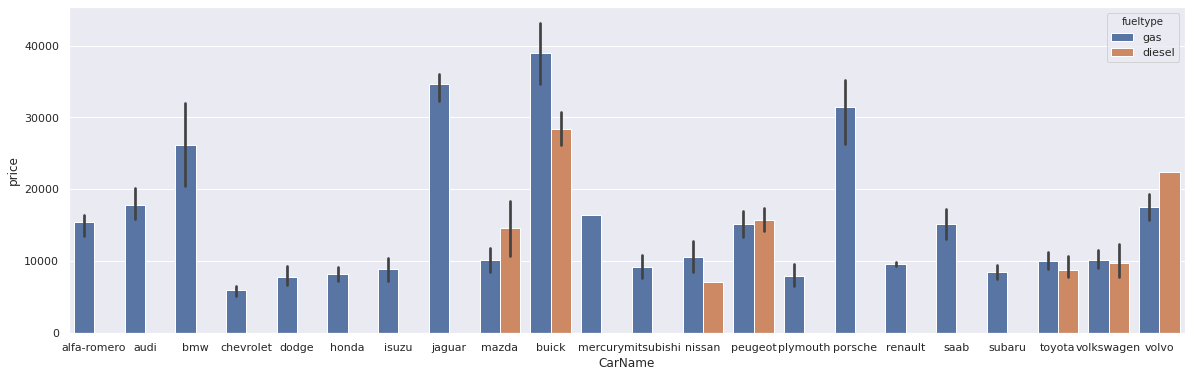

In [25]:
fig=plt.subplots(figsize=(20,6));
sns.barplot(x='CarName',y='price',hue='fueltype',data=data);

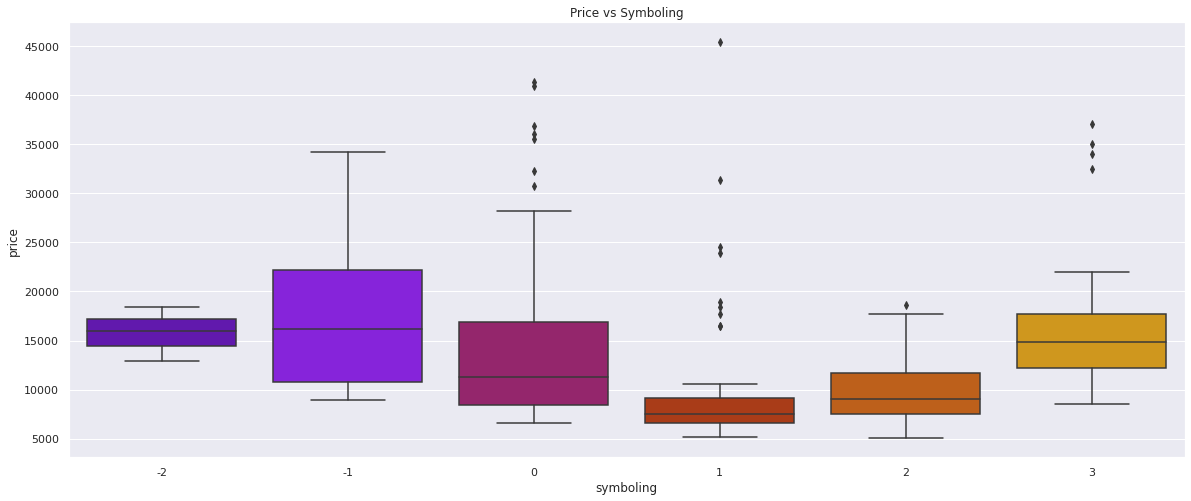

In [26]:
plt.figure(figsize=(20,8));
sns.boxplot(x=data['symboling'],y=data['price'],palette='gnuplot')
plt.title('Price vs Symboling');

# Visualizing Numeric Data

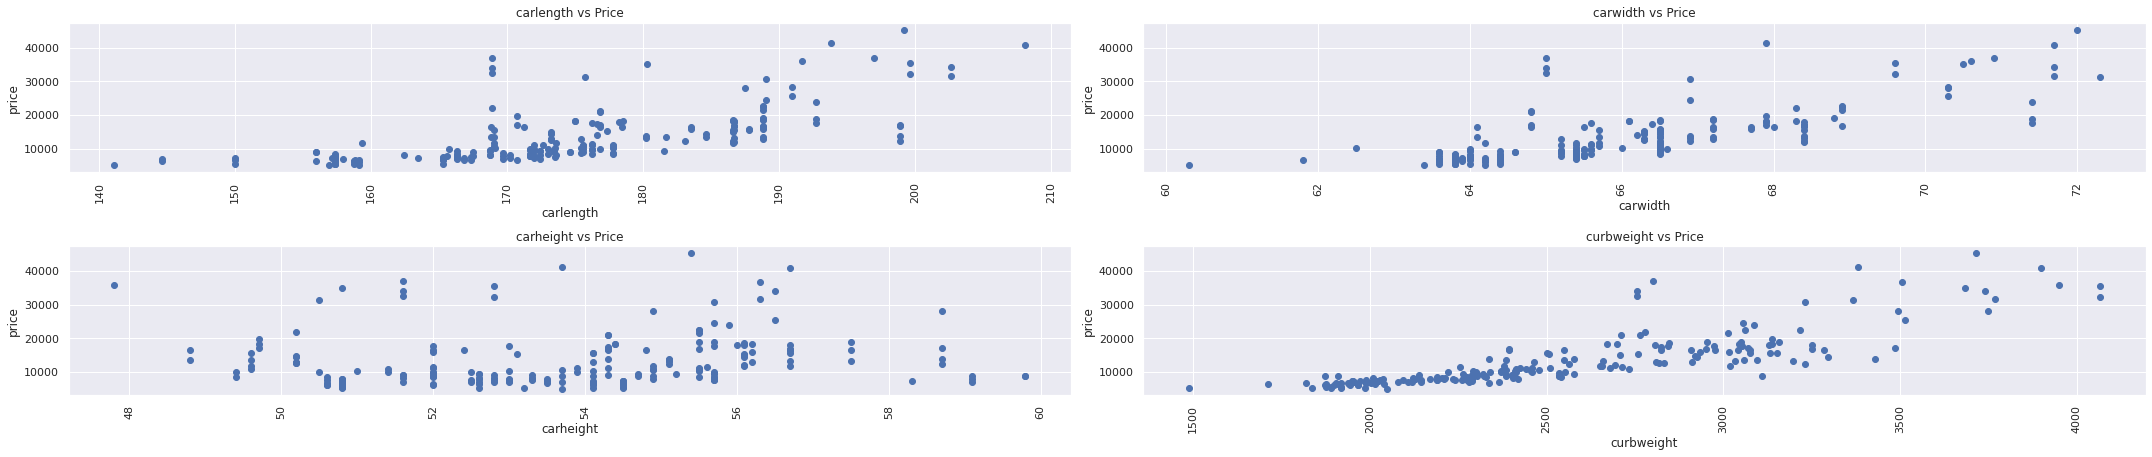

In [27]:
plt.figure(figsize=(30,15));
scatter_plot('carlength',1);
scatter_plot('carwidth',2);
scatter_plot('carheight',3);
scatter_plot('curbweight',4);
plt.tight_layout();

#Carlength, carwidth, curbweigt show linear positive trend with price whereas carheight show no trend with price;

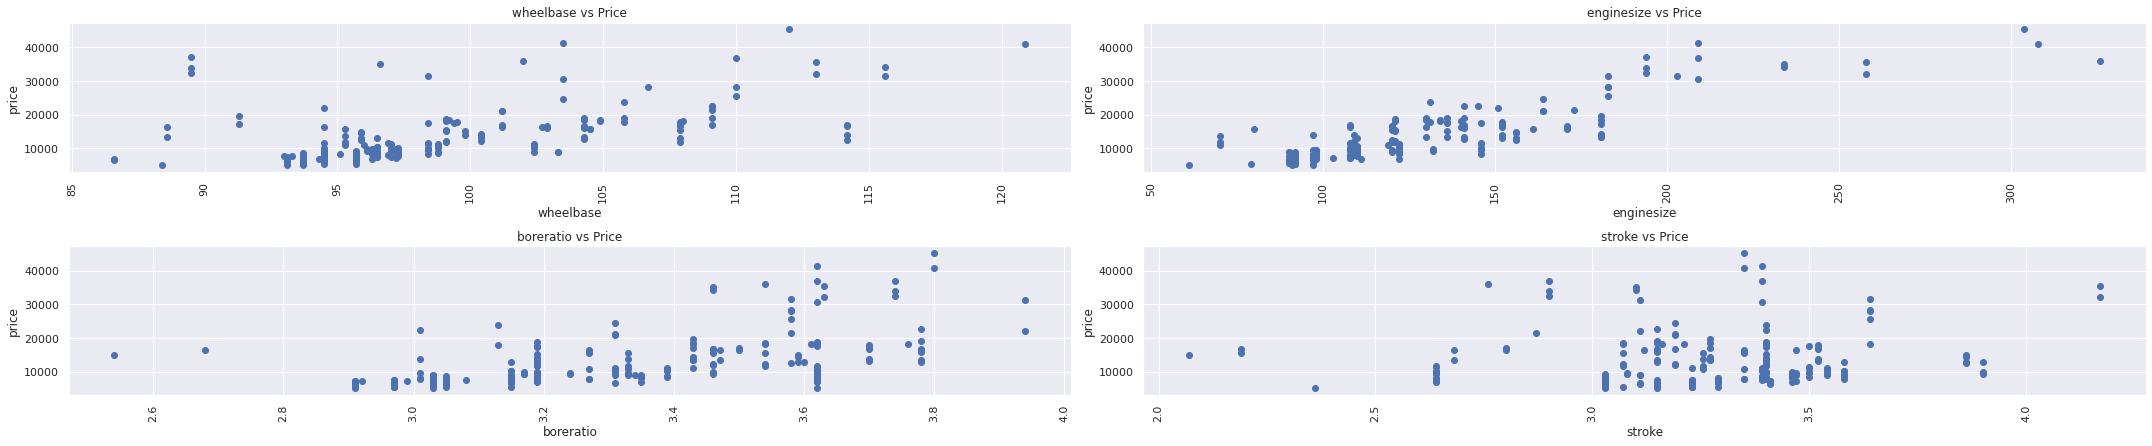

In [28]:
plt.figure(figsize=(30,15));
scatter_plot('wheelbase',1);
scatter_plot('enginesize',2);
scatter_plot('boreratio',3);
scatter_plot('stroke',4);
plt.tight_layout()
#wheelbase, enginesize, boreratio show positive trend with price;

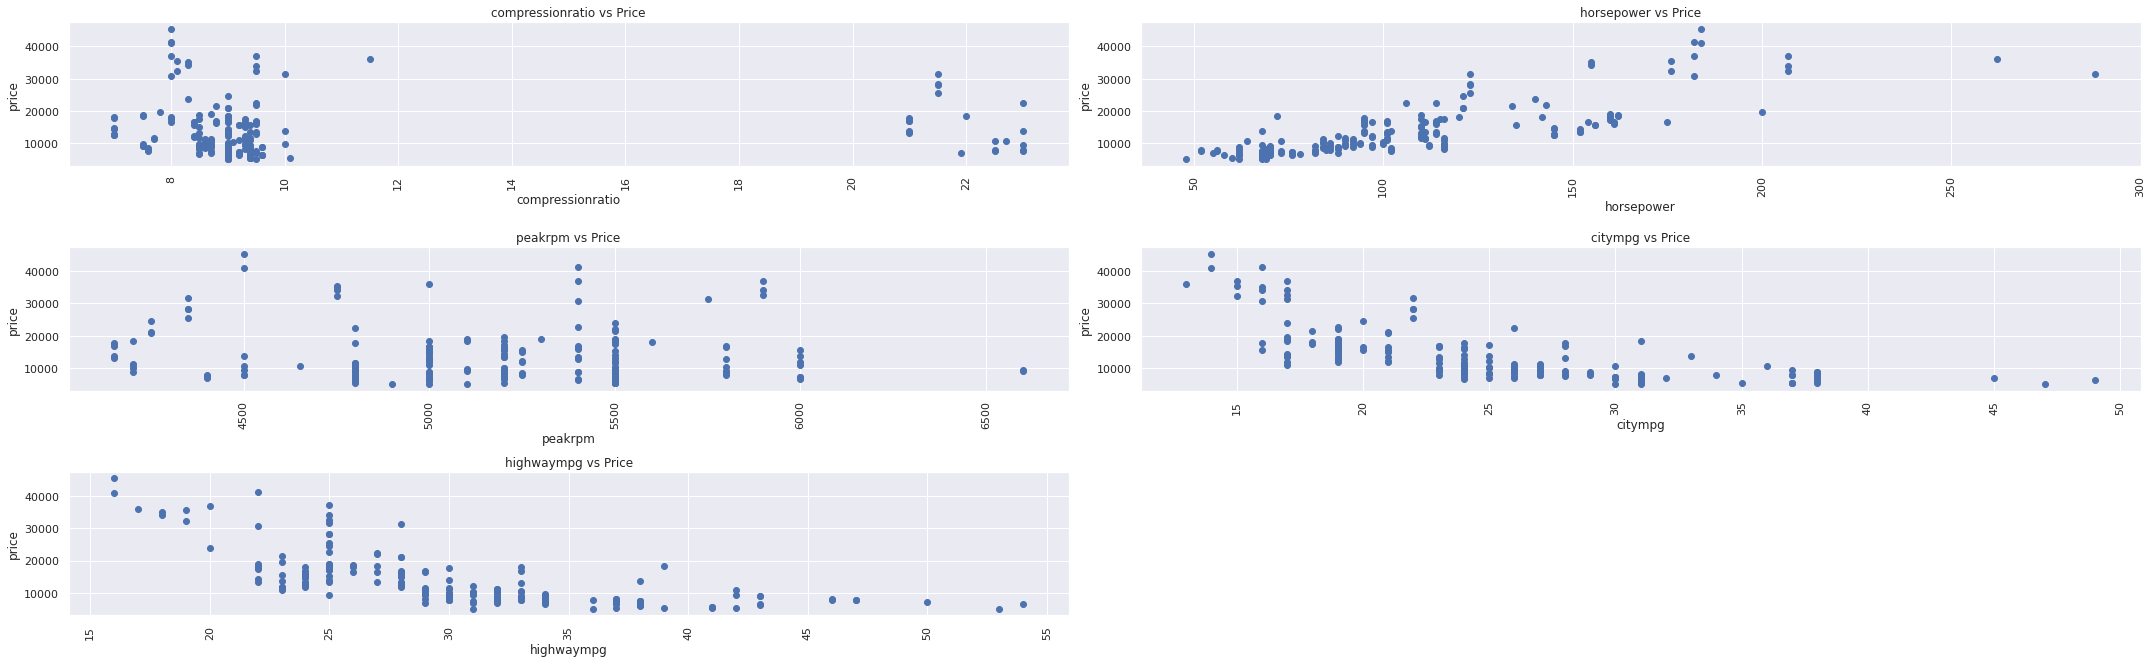

In [29]:
plt.figure(figsize=(30,15));
scatter_plot('compressionratio',1);
scatter_plot('horsepower',2);
scatter_plot('peakrpm',3);
scatter_plot('citympg',4);
scatter_plot('highwaympg',5);
plt.tight_layout();
#highwaympg, citympg, peakrpm, compression ratio show negative or no trend with price

# After visualizing both categorical and numerical columns it is clear that some columns show negative or no trend in relation to price and have to be dropped

In [30]:
cols_to_drop=['highwaympg','citympg','peakrpm','compressionratio','stroke','doornumber','car_ID','symboling','enginelocation','CarName'];
data.drop(cols_to_drop,axis=1,inplace=True);
data.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,17450.0


In [31]:
print(data.shape);
data.info()

(205, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    object 
 1   aspiration      205 non-null    object 
 2   carbody         205 non-null    object 
 3   drivewheel      205 non-null    object 
 4   wheelbase       205 non-null    float64
 5   carlength       205 non-null    float64
 6   carwidth        205 non-null    float64
 7   carheight       205 non-null    float64
 8   curbweight      205 non-null    int64  
 9   enginetype      205 non-null    object 
 10  cylindernumber  205 non-null    object 
 11  enginesize      205 non-null    int64  
 12  fuelsystem      205 non-null    object 
 13  boreratio       205 non-null    float64
 14  horsepower      205 non-null    int64  
 15  price           205 non-null    float64
dtypes: float64(6), int64(3), object(7)
memory usage: 25.8+ KB


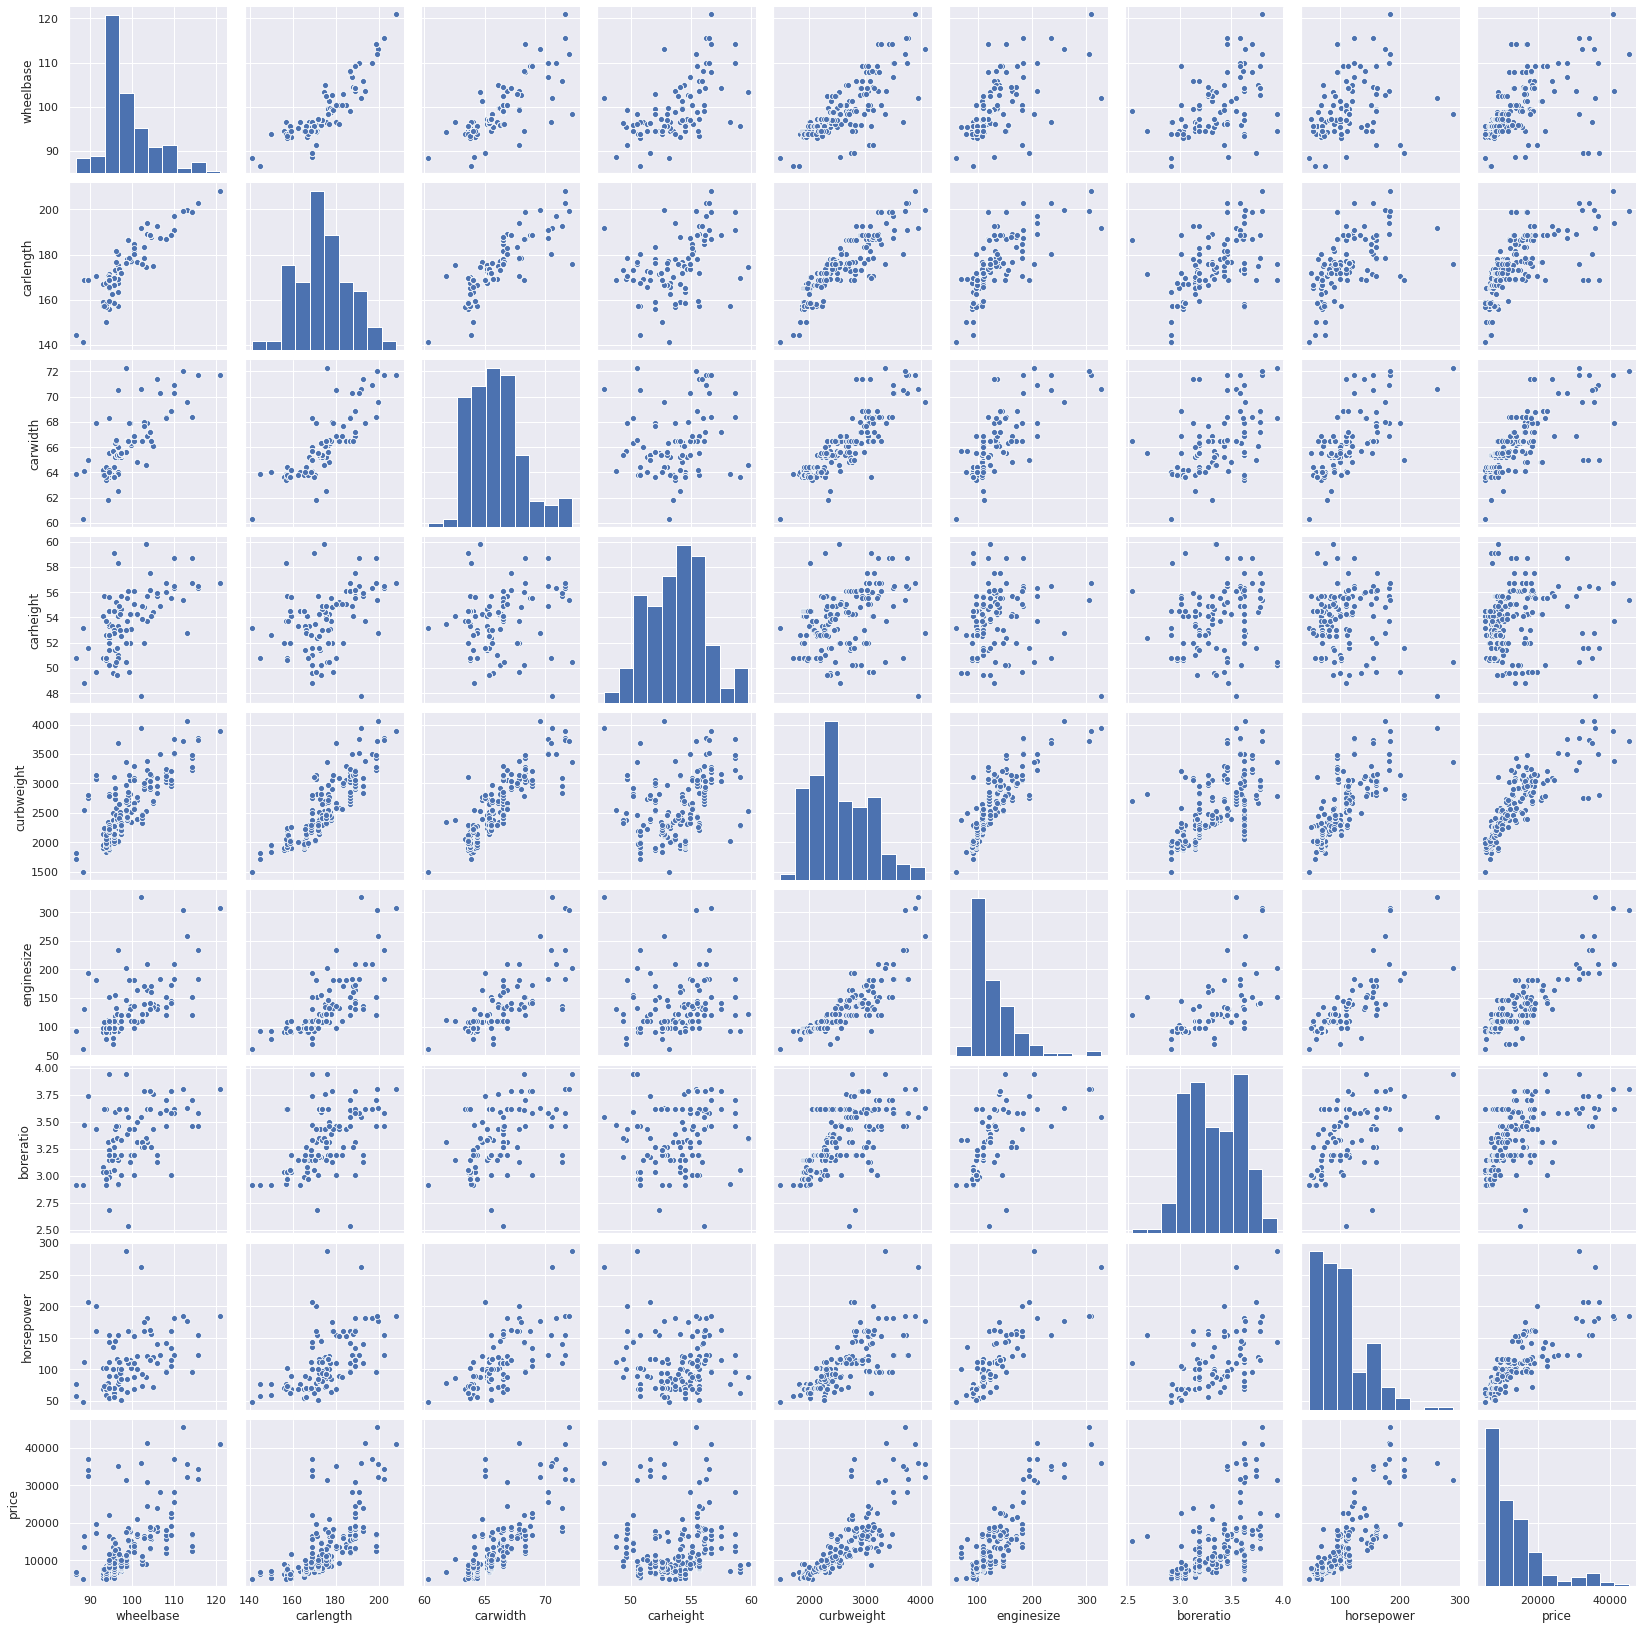

In [32]:
sns.pairplot(data)

# Separating Target and Features

In [33]:
y=data['price'];
X=data.drop('price',axis=1,inplace=True);
data.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower
0,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111
1,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111
2,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154
3,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102
4,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115


In [34]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,104.117073
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,39.544167
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,48.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,70.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,95.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,116.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,288.000000


In [35]:
#Splitting the data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(data,y,train_size=0.7, test_size=0.3,random_state=0);

#Separating Categorical and Numerical Columns
cat_cols=[cname for cname in X_train.columns if X_train[cname].nunique()<10 and X_train[cname].dtype=='object'];
num_cols=[cname for cname in X_train.columns if X_train[cname].dtype in ['int64','float64']];

my_cols=cat_cols + num_cols;
X_train=X_train[my_cols].copy();
X_test=X_test[my_cols].copy();

In [36]:
X_train['enginetype'].unique()

array(['ohc', 'rotor', 'ohcv', 'ohcf', 'l', 'dohc'], dtype=object)

In [37]:
X_test['enginetype'].unique()

array(['ohc', 'dohc', 'l', 'ohcv', 'dohcv', 'rotor', 'ohcf'], dtype=object)

In [38]:
print(X_train['cylindernumber'].unique());
print(X_test['cylindernumber'].unique());
print(X_train['fuelsystem'].unique());
print(X_test['fuelsystem'].unique());

['four' 'two' 'six' 'five' 'eight' 'twelve']
['four' 'six' 'five' 'three' 'eight' 'two']
['1bbl' '2bbl' '4bbl' 'mpfi' 'idi' 'spfi' 'spdi' 'mfi']
['2bbl' 'mpfi' '1bbl' '4bbl' 'idi' 'spdi']


In [39]:
print(X_train.shape);
print(X_test.shape);
print(y_train.shape);
print(y_test.shape);

(143, 15)
(62, 15)
(143,)
(62,)


# Separting categorical columns that are mismatched in train and test datasets

In [40]:
good_label_cols = [col for col in cat_cols if 
                   set(X_train[col]) == set(X_test[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(cat_cols)-set(good_label_cols))

In [41]:
good_label_cols

['fueltype', 'aspiration', 'carbody', 'drivewheel']

In [42]:
bad_label_cols

['enginetype', 'cylindernumber', 'fuelsystem']

# Label encoding only those columns that match in both train and test dataset

In [43]:
#Label Encoding Categorical Data;
from sklearn.preprocessing import LabelEncoder

label_X_train=X_train.drop(bad_label_cols,axis=1);
label_X_test=X_test.drop(bad_label_cols,axis=1);

encoded=LabelEncoder();
for col in good_label_cols:
    label_X_train[col]=encoded.fit_transform(X_train[col]);
    label_X_test[col]=encoded.transform(X_test[col]);


In [44]:
label_X_train.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower
40,1,0,3,1,96.5,175.4,62.5,54.1,2372,110,3.15,86
60,1,0,3,1,98.8,177.8,66.5,55.5,2410,122,3.39,84
56,1,0,2,2,95.3,169.0,65.7,49.6,2380,70,3.33,101
101,1,0,3,1,100.4,181.7,66.5,55.1,3095,181,3.43,152
86,1,0,3,1,96.3,172.4,65.4,51.6,2405,122,3.35,88


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model=RandomForestRegressor(n_estimators=100,random_state=0);
model.fit(label_X_train,y_train);
prediction=model.predict(label_X_test);
print(r2_score(prediction,y_test));

0.8844890233296709
